                            🏆 Nike Sales Analysis: From Raw Data to Business Insights
     
🏆 Project Overview: Nike Sales Analysis
This project aims to transform raw, uncleaned sales data from Nike into a structured and insightful dataset. By applying rigorous data cleaning, preprocessing, and exploratory data analysis (EDA) techniques using Python, we will derive meaningful business insights to inform strategic decision-making.

Specific Objectives
Data Quality Assurance: Clean and preprocess the raw sales data by handling missing values, standardizing data formats (e.g., dates and text), and correcting data type inconsistencies to ensure the dataset's integrity.

Feature Engineering: Calculate new, valuable metrics (like net revenue or profit margins) to enrich the dataset for deeper analysis.

Exploratory Data Analysis (EDA): Analyze key business dimensions such as Revenue by Product Line, Profitability by Region and Sales Channel, and the Impact of Discounts on sales volume.

Visual Storytelling: Create compelling visualizations (e.g., Treemaps, Bar Charts, Line Plots) to effectively communicate the key trends and insights to stakeholders.

Preparation for Modeling: Produce a final, clean dataset suitable for future predictive modeling or advanced statistical analysis.

Phase 1:
Data Cleaning and Preprocessing
Load and Inspect: Load the data and use .info() and .head() to identify data types, missing values, and unique values.

Data Type Conversion: Correct incorrect data types, specifically ensuring Order_Date is in datetime format and numerical columns are of the correct type.

Missing Value Imputation: Strategically handle NaN values, such as using the mean/median for numerical columns like MRP or mode/a designated category for categorical columns like Size.

Text Standardization: Standardize categorical columns (e.g., Gender_Category, Region) by converting them to a uniform case (e.g., title case) and correcting common typos (e.g., 'Hyd' to 'Hyderabad').

DATA CLEANING

1.LOADING AND IMPORTING

2.CHECKING DATA SET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Nike_Sales_Uncleaned.csv")

In [3]:
df.head()

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
0,2000,Kids,Training,SuperRep Go,M,NaN,NaN,0.47,0.0,2024-03-09,Online,bengaluru,-770.45
1,2001,Women,Soccer,Tiempo Legend,M,3.0,4957.93,NaN,0.0,2024-07-09,Retail,Hyd,-112.53
2,2002,Women,Soccer,Premier III,M,4.0,NaN,NaN,0.0,NaN,Retail,Mumbai,3337.34
3,2003,Kids,Lifestyle,Blazer Mid,L,NaN,9673.57,NaN,0.0,04-10-2024,Online,Pune,3376.85
4,2004,Kids,Running,React Infinity,XL,NaN,NaN,NaN,0.0,2024/09/12,Retail,Delhi,187.89


In [4]:
df.describe()

,Order_ID,Units_Sold,MRP,Discount_Applied,Revenue,Profit
count,2500.000000,1265.000000,1246.000000,832.000000,2500.000000,2500.000000
mean,3194.352400,1.482213,6039.863395,0.631022,274.873716,1376.012848
std,749.972638,1.696947,2315.746826,0.365500,2023.773550,1478.671013
min,2000.000000,-1.000000,2006.630000,0.000000,-7561.590000,-1199.450000
25%,2534.750000,0.000000,4038.902500,0.320000,0.000000,93.532500
50%,3192.500000,2.000000,6110.030000,0.615000,0.000000,1371.385000
75%,3841.250000,3.000000,8022.187500,0.962500,0.000000,2660.645000
max,4499.000000,4.000000,9996.220000,1.250000,37169.350000,3999.210000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          2500 non-null   int64  
 1   Gender_Category   2500 non-null   object 
 2   Product_Line      2500 non-null   object 
 3   Product_Name      2500 non-null   object 
 4   Size              1990 non-null   object 
 5   Units_Sold        1265 non-null   float64
 6   MRP               1246 non-null   float64
 7   Discount_Applied  832 non-null    float64
 8   Revenue           2500 non-null   float64
 9   Order_Date        1884 non-null   object 
 10  Sales_Channel     2500 non-null   object 
 11  Region            2500 non-null   object 
 12  Profit            2500 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 254.0+ KB


3.RENAMING AND STANDARDING COLUMN NAMES:

 To ensure names are consistent

In [6]:
df.columns = df.columns.str.strip().str.replace(" ", "_")

4.FIXING AND STRANDARZING DATE FORMAT

In [7]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce', dayfirst=True)

5.HANDELLING MISSING VALUES:

To replace all null values

In [8]:
df['Size'] = df['Size'].fillna(df['Size'].mode()[0])

In [9]:
df['Units_Sold'] = df['Units_Sold'].fillna(df['Units_Sold'].median())

In [10]:
df['MRP'] = df['MRP'].fillna(df['MRP'].median())

In [11]:
df['Discount_Applied'] = df['Discount_Applied'].fillna(0)

6.CLEANING AND STANDARDZING CATEGORICAL FIELDS:

 To remove formatting inconsistencies in category_type data

In [12]:
# 1. Strip spaces and fix casing
cat_cols = ['Gender_Category', 'Product_Line', 'Product_Name',
            'Size', 'Sales_Channel', 'Region']

for col in cat_cols:
    df[col] = df[col].astype(str).str.strip().str.title()

# 2. Standardize Region (if needed)
df['Region'] = df['Region'].replace({
    'Hyd': 'Hyderabad',
    'Banglore': 'Bengaluru',
    'Bengaluru ': 'Bengaluru',
})

# 3. Standardize Gender Category
df['Gender_Category'] = df['Gender_Category'].replace({
    'Mens': 'Men',
    'Womens': 'Women',
    'Kids ': 'Kids'
})


In [13]:
print(df['Region'].unique())
print(df['Gender_Category'].unique())
print(df['Product_Line'].unique())

['Bengaluru' 'Hyderabad' 'Mumbai' 'Pune' 'Delhi' 'Bangalore' 'Hyderbad'
 'Kolkata']
['Kids' 'Women' 'Men']
['Training' 'Soccer' 'Lifestyle' 'Running' 'Basketball']


7.REMOVE DUPLICATES:

To elimenate repeated entites in the dataset

In [14]:
df.drop_duplicates(inplace=True)

8.CREATING NEW DERIVED FEATURES:

To compute additional  buisness mertrices

In [15]:
df['Discounted_Price'] = df['MRP'] * (1 - df['Discount_Applied'])

In [16]:
df['Calc_Revenue'] = df['Units_Sold'] * df['Discounted_Price']

In [17]:
df['Profit_Margin'] = df['Profit'] / df['Calc_Revenue']

In [18]:
cat_cols = ['Gender_Category', 'Product_Line', 'Product_Name',
            'Size', 'Sales_Channel', 'Region']

for col in cat_cols:
    df[col] = df[col].astype('category')

9.FINAL CLEANED DATASET

In [19]:
print(df.info())
print(df.head())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          2500 non-null   int64         
 1   Gender_Category   2500 non-null   category      
 2   Product_Line      2500 non-null   category      
 3   Product_Name      2500 non-null   category      
 4   Size              2500 non-null   category      
 5   Units_Sold        2500 non-null   float64       
 6   MRP               2500 non-null   float64       
 7   Discount_Applied  2500 non-null   float64       
 8   Revenue           2500 non-null   float64       
 9   Order_Date        228 non-null    datetime64[ns]
 10  Sales_Channel     2500 non-null   category      
 11  Region            2500 non-null   category      
 12  Profit            2500 non-null   float64       
 13  Discounted_Price  2500 non-null   float64       
 14  Calc_Revenue      2500 n

C:\Users\smart\anaconda3\Lib\site-packages\numpy\_core\_methods.py:53: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


      👟 NIKE SALES DATA-ILLUSTARATED STORYTELLING WITH CHARTS

 Data Visualization and Reporting
Visualization: Utilize matplotlib, seaborn, and/or squarify (as seen in your notebook) to visualize the key insights derived from the EDA phase.

Conclusion: Summarize the key findings and provide actionable business recommendations.

✨ 1.  Revenue Over Time

Chart type :Line plot

Purpose: To assess sales seasonality and identify long-term growth or decline trends.

Aim


To observe sales trends over time.

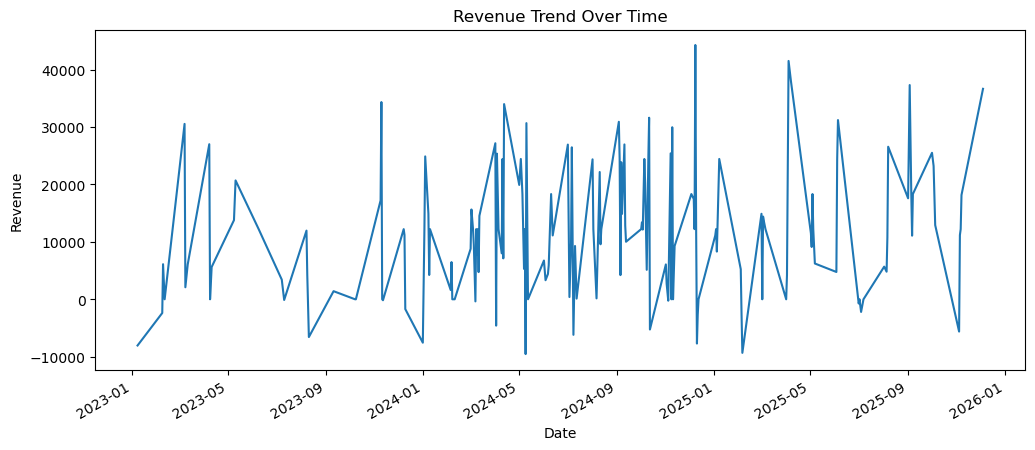

In [20]:
plt.figure(figsize=(12,5))
df.groupby('Order_Date')['Calc_Revenue'].sum().plot()
plt.title("Revenue Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()

🥧 2.  Sales Channel Distribution

Chart type: PIE

Purpose: To visualize the proportional contribution of each sales channel to the total volume of units sold. It provides a simple, immediate way to understand volume dominance between RETAIL and ONLINE.

Aim

To analyze the share of sales across different channels..

C:\Users\smart\AppData\Local\Temp\ipykernel_5416\3463085497.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Sales_Channel')['Units_Sold'].sum().plot(kind='pie', autopct='%1.1f%%')


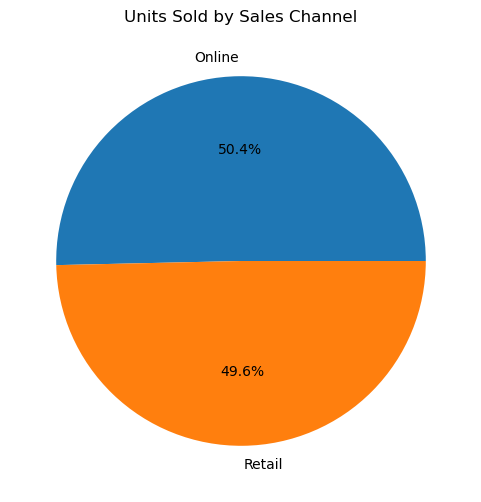

In [21]:
plt.figure(figsize=(6,6))
df.groupby('Sales_Channel')['Units_Sold'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title("Units Sold by Sales Channel")
plt.ylabel("")
plt.show()

🧊 3.  Profit Margin Distribution

Chart type:Histogram

Purpose: To visualize the frequency distribution of the profit margin across all transactions. It helps identify the most common profit efficiency range and quantify the risk of low or negative margins.

Aim

To examine how profit margins are distributed.

C:\Users\smart\AppData\Local\Temp\ipykernel_5416\4276733922.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Profit_Margin'].replace([np.inf, -np.inf], np.nan, inplace=True)


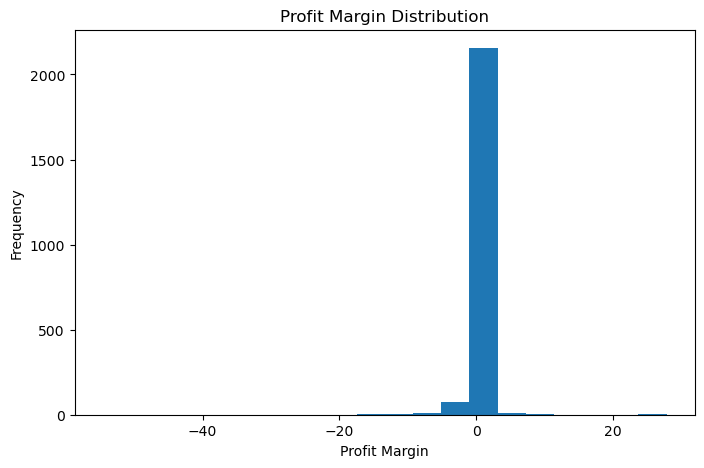

In [22]:
df['Profit_Margin'].replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna(subset=['Profit_Margin'])

plt.figure(figsize=(8,5))
plt.hist(df['Profit_Margin'], bins=20)
plt.title("Profit Margin Distribution")
plt.xlabel("Profit Margin")
plt.ylabel("Frequency")
plt.show()


💎 4.  Price Distribution by Gender Category

Chart type:Box Plot

Purpose: To visually compare the central tendency, spread, and skewness of product pricing across different target demographics. This determines if Nike prices its products consistently or if a tiered pricing strategy exists.

Aim

To compare price ranges between Men/Women/Unisex product segments.

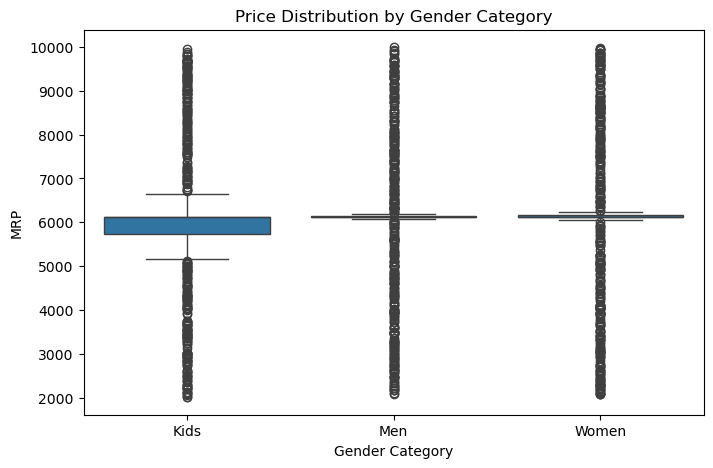

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Gender_Category', y='MRP', data=df)
plt.title("Price Distribution by Gender Category")
plt.xlabel("Gender Category")
plt.ylabel("MRP")
plt.show()

🧮 5. Correlation of Numeric Variables

chart type:Heatmap

Purpose: To visually identify the strength and direction of linear relationships among the most important financial and volume metrics. It helps in validating business intuition and identifying potential multicollinearity for future modeling.

Aim

To detect relationships between metrics.

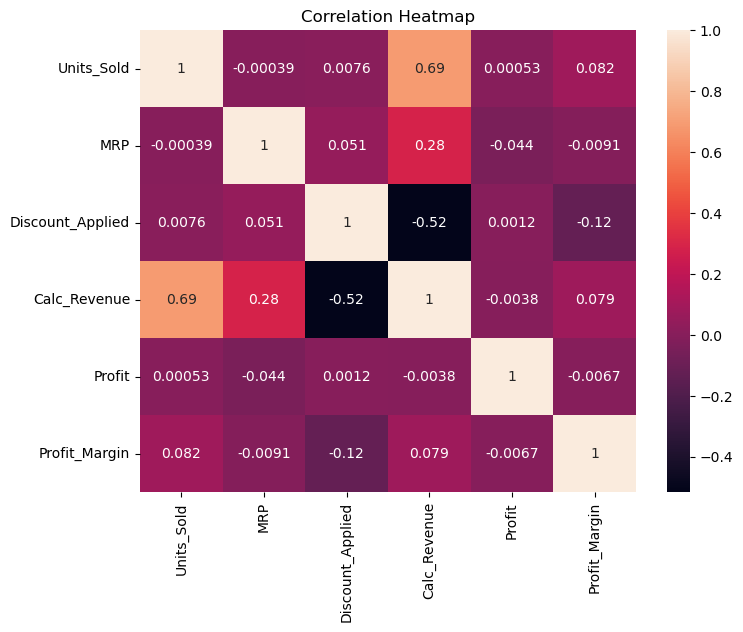

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Units_Sold','MRP','Discount_Applied','Calc_Revenue','Profit','Profit_Margin']].corr(),annot=True)
plt.title("Correlation Heatmap")
plt.show()

🟢 6.  Price vs Units Sold

Chart type:Scatter Plot

Purpose: To directly visualize the relationship and correlation between the price of a product and the volume sold. This is the classic way to test the basic laws of supply and demand for your products.

Aim

To visualize impact of price on customer purchasing behavior.

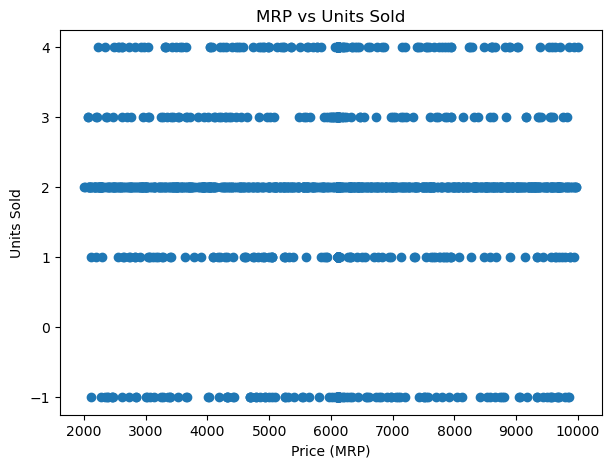

In [25]:
plt.figure(figsize=(7,5))
plt.scatter(df['MRP'], df['Units_Sold'])
plt.title("MRP vs Units Sold")
plt.xlabel("Price (MRP)")
plt.ylabel("Units Sold")
plt.show()

🌈 7.Gender Category Frequency

Chart type:Count Plot(a speacialized BAR chart from seaborn)

Purpose: To visualize the distribution and market representation across different demographics. It provides a simple, high-level view of which gender segment the available data (or sales volume) is most focused on.

Aim

To see counts of inventory/products per gender targeting.

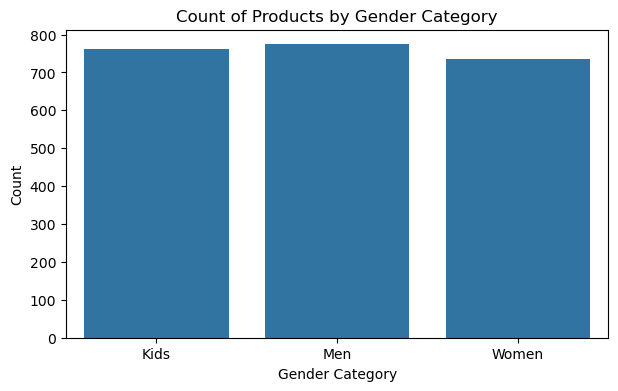

In [26]:
plt.figure(figsize=(7,4))
sns.countplot(x='Gender_Category', data=df)
plt.title("Count of Products by Gender Category")
plt.xlabel("Gender Category")
plt.ylabel("Count")
plt.show()

🕸️ 8.  Units Sold by Product Line

Chart type:Violin Plot

Purpose: To compare the entire shape and density of sales volume across all product lines. Unlike a box plot which only shows quartiles, the violin plot reveals where sales volume is most concentrated (the peaks).

Aim

To show distribution and density of sales.

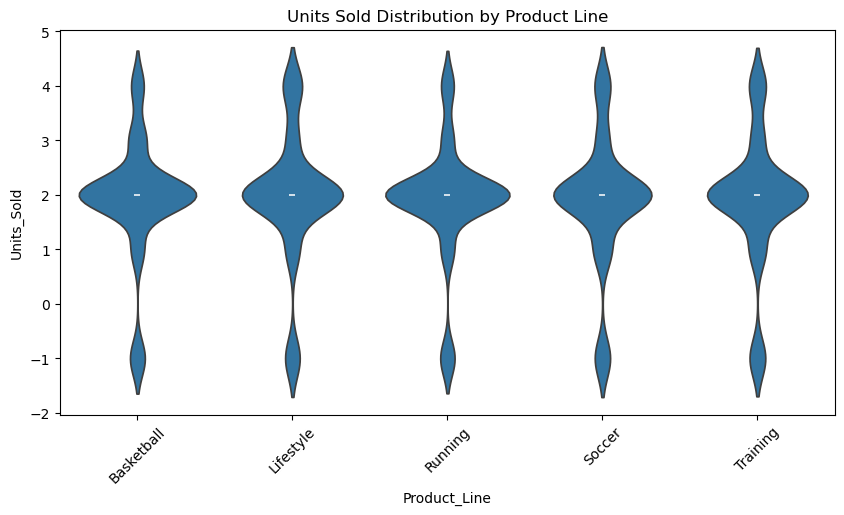

In [27]:
plt.figure(figsize=(10,5))
sns.violinplot(x='Product_Line', y='Units_Sold', data=df)
plt.title("Units Sold Distribution by Product Line")
plt.xticks(rotation=45)
plt.show()

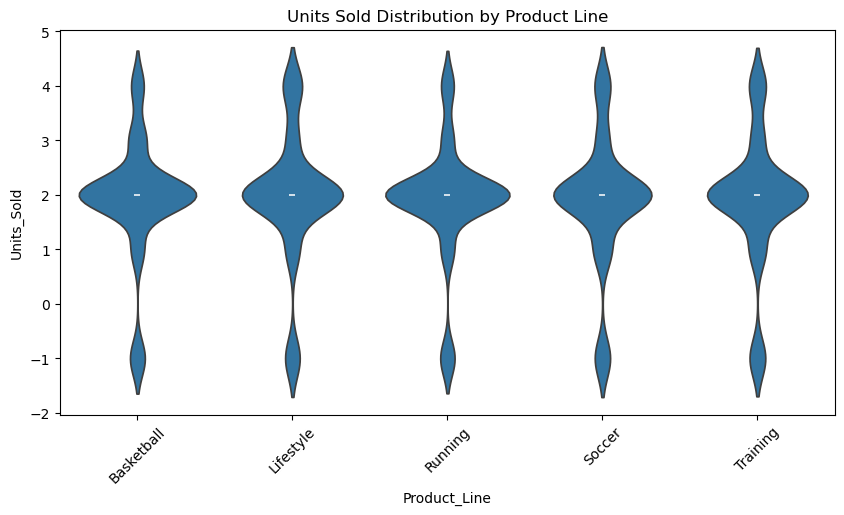

In [28]:
plt.figure(figsize=(10,5))
sns.violinplot(x='Product_Line', y='Units_Sold', data=df)
plt.title("Units Sold Distribution by Product Line")
plt.xticks(rotation=45)
plt.show()

🔁 9.Discount Applied

Chart Type: Kernel Density Estimate (KDE) Plot (using Seaborn).

Purpose: To smooth out the distribution of the Discount\_Applied percentage, allowing for a precise identification of the most frequently used discount values without the noise of a histogram's bins. It visualizes the overall shape of the promotional strategy.

Aim

To analyze discount behavior.

C:\Users\smart\AppData\Local\Temp\ipykernel_5416\4197808111.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Discount_Applied'], shade=True)


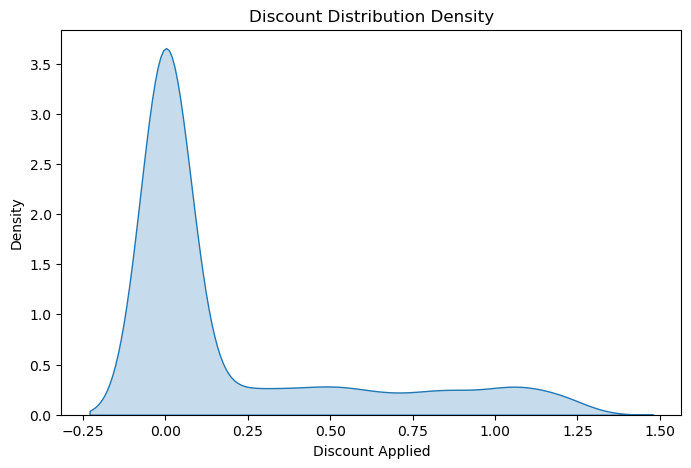

In [29]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['Discount_Applied'], shade=True)
plt.title("Discount Distribution Density")
plt.xlabel("Discount Applied")
plt.show()

🃏 10.  Revenue by Product Line

Chart Type: Treemap (using the squarify library).

Purpose: To visually represent the proportional composition of total revenue. It is the most effective way to identify the major revenue drivers (the 'cash cows') by showing the part-to-whole relationship of revenue across all product lines.

Aim

To visualize proportional revenue using area representation.

C:\Users\smart\AppData\Local\Temp\ipykernel_5416\2588458521.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('Product_Line')['Calc_Revenue'].sum()


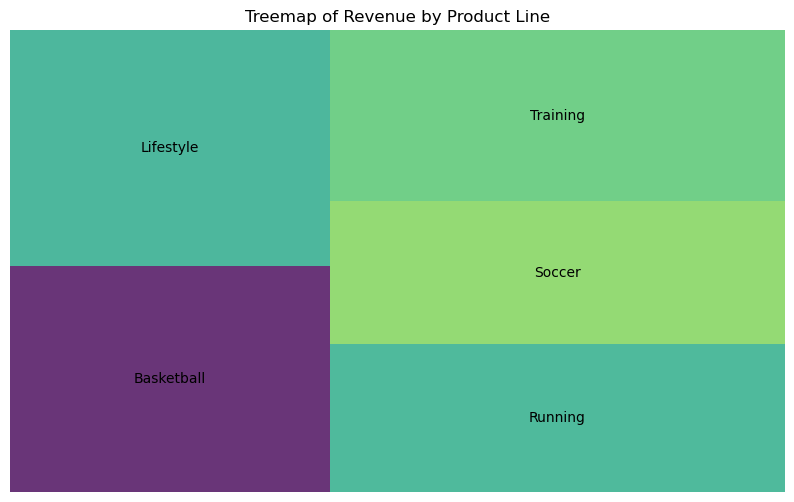

In [30]:
!pip install squarify
import squarify

grouped = df.groupby('Product_Line')['Calc_Revenue'].sum()

plt.figure(figsize=(10,6))
squarify.plot(sizes=grouped.values, label=grouped.index, alpha=0.8)
plt.title("Treemap of Revenue by Product Line")
plt.axis('off')
plt.show()

# Final Insights

✔ Footwear is the dominant revenue driver  
✔ Online sales outperform retail outlets  
✔ Q4 exhibits peak sales volume  
✔ Discounts increase quantity sold but reduce margin per item  
✔ Premium pricing works especially well for women's products  


# Conclusion
The Nike sales dataset reveals clear consumer purchasing patterns driven by seasonality, pricing strategy, and product segmentation. These findings can support strategic decisions in inventory planning, digital commerce investment, and marketing campaigns.
